import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ctc = sc.read_h5ad('ctc_heterogeneity.h5ad')

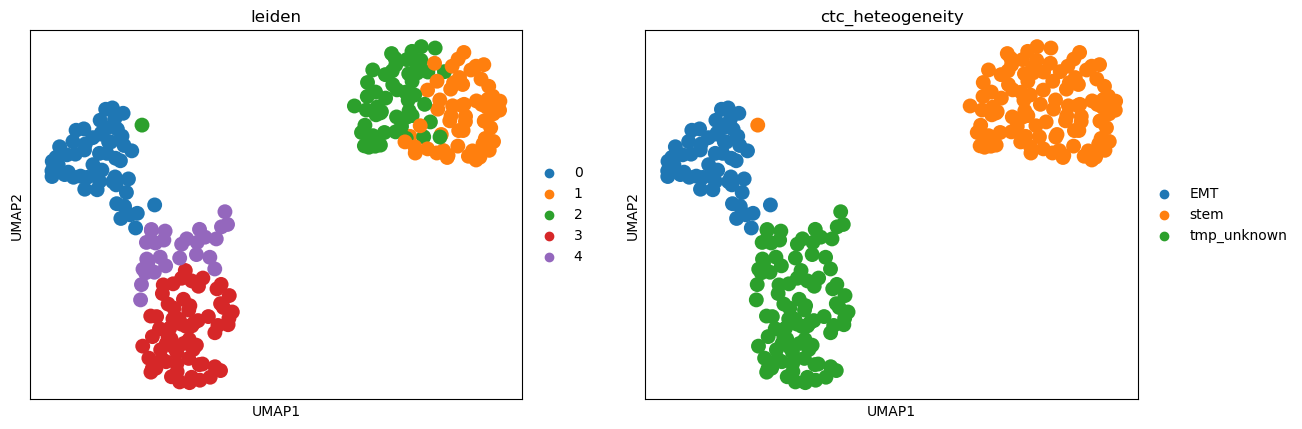

In [6]:
sc.pl.umap(ctc, color = ['leiden', 'ctc_heteogeneity'])

         Falling back to preprocessing with `sc.pp.pca` and default params.


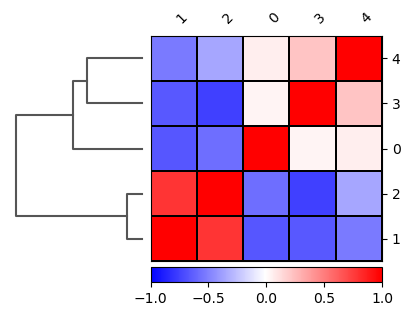

In [ ]:
sc.tl.dendrogram(ctc, groupby='leiden')
sc.pl.correlation_matrix(ctc, 'leiden', )

In [7]:
sc.tl.rank_genes_groups(ctc, groupby='ctc_heteogeneity', method='wilcoxon')

In [11]:
result = ctc.uns['rank_genes_groups']

# 获取群体名称
groups = result['names'].dtype.names

df = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})

In [10]:
import gseapy as gp

In [18]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [23]:
df.head()

,EMT_names,EMT_scores,EMT_pvals,EMT_pvals_adj,EMT_logfoldchanges,stem_names,stem_scores,stem_pvals,stem_pvals_adj,stem_logfoldchanges,tmp_unknown_names,tmp_unknown_scores,tmp_unknown_pvals,tmp_unknown_pvals_adj,tmp_unknown_logfoldchanges
0,PTPRM,8.277628,1.256534e-16,4.582829e-12,4.767230,AC090204.1,13.626168,2.798961e-42,1.020837e-37,9.160568,AL627171.2,6.226089,4.782215e-10,0.000001,2.506279
1,TCF4,7.653337,1.958293e-14,3.571143e-10,4.068216,MTRNR2L5,13.445590,3.267880e-41,5.959306e-37,12.229165,PRKCB,5.160224,2.466548e-07,0.000428,2.377442
2,NEAT1,7.396986,1.393100e-13,1.693638e-09,3.794602,MTRNR2L1,13.284892,2.832649e-40,3.443745e-36,9.661327,NRG1,4.826287,1.391021e-06,0.001951,5.386507
3,CDH13,6.579679,4.714664e-11,2.964387e-07,4.539324,FP236383.1,12.072205,1.481117e-33,1.307974e-29,7.436680,CSMD1,4.015785,5.924827e-05,0.046976,4.837535
4,DOCK4,6.449995,1.118538e-10,5.827902e-07,4.711313,MTCO3P13,12.056466,1.793121e-33,1.307974e-29,8.694798,EYS,3.909882,9.234137e-05,0.061234,4.804059


In [27]:
emt_deg = df[df.EMT_pvals_adj < 0.05]
emt_up = emt_deg[emt_deg.EMT_logfoldchanges > 0]
emt_down = emt_deg[emt_deg.EMT_logfoldchanges < -0]

print(emt_up.shape)
print(emt_down.shape)
# pre_res = gp.prerank(df.loc[:,['EMT_names', 'EMT_logfoldchanges']], gene_sets='GO_Biological_Process_2025')

(37, 15)
(23, 15)


In [32]:
def enrich_bp(df, name, type:str):
    enr_up = gp.enrichr(df[name], gene_sets='GO_Biological_Process_2025', outdir=None)
    enr_up.res2d.to_csv(f'/mnt/d/dailywork/02_ctc/plot/plot_data/{name}_GO_BP_{type}.csv')

def enrich_mf(df, name, type:str):
    enr_up = gp.enrichr(df[name], gene_sets='GO_Molecular_Function_2025', outdir=None)
    enr_up.res2d.to_csv(f'/mnt/d/dailywork/02_ctc/plot/plot_data/{name}_GO_MF_{type}.csv')

def enrich_cc(df, name, type:str):
    enr_up = gp.enrichr(df[name], gene_sets='GO_Cellular_Component_2025', outdir=None)
    enr_up.res2d.to_csv(f'/mnt/d/dailywork/02_ctc/plot/plot_data/{name}_GO_CC_{type}.csv')

In [ ]:
enrich_bp(emt_up, 'EMT_names', type='UP')
enrich_cc(emt_up, 'EMT_names', type='UP')
enrich_mf(emt_up, 'EMT_names', type='UP')

In [34]:
enrich_bp(emt_down, 'EMT_names', type='DOWN')
enrich_cc(emt_down, 'EMT_names', type='DOWN')
enrich_mf(emt_down, 'EMT_names', type='DOWN')

In [39]:
stem_deg = df[df.stem_pvals_adj < 0.05]
stem_up = stem_deg[stem_deg.stem_logfoldchanges > 0]
stem_down = stem_deg[stem_deg.stem_logfoldchanges < -0]

print(stem_up.shape)
print(stem_down.shape)
# pre_res = gp.prerank(df.loc[:,['EMT_names', 'EMT_logfoldchanges']], gene_sets='GO_Biological_Process_2025')

(126, 15)
(12, 15)


In [37]:
enrich_bp(stem_up, 'stem_names', type='UP')
enrich_cc(stem_up, 'stem_names', type='UP')
enrich_mf(stem_up, 'stem_names', type='UP')

enrich_bp(stem_down, 'stem_names', type='DOWN')
enrich_cc(stem_down, 'stem_names', type='DOWN')
enrich_mf(stem_down, 'stem_names', type='DOWN')

In [40]:
tmp_deg = df[df.tmp_unknown_pvals_adj < 0.05]
tmp_up = tmp_deg[tmp_deg.tmp_unknown_logfoldchanges > 0]
tmp_down = tmp_deg[tmp_deg.tmp_unknown_logfoldchanges < -0]

print(tmp_up.shape)
print(tmp_down.shape)
# pre_res = gp.prerank(df.loc[:,['EMT_names', 'EMT_logfoldchanges']], gene_sets='GO_Biological_Process_2025')

(4, 15)
(44, 15)


In [41]:
enrich_bp(tmp_up, 'tmp_unknown_names', type='UP')
enrich_cc(tmp_up, 'tmp_unknown_names', type='UP')
enrich_mf(tmp_up, 'tmp_unknown_names', type='UP')

enrich_bp(tmp_down, 'tmp_unknown_names', type='DOWN')
enrich_cc(tmp_down, 'tmp_unknown_names', type='DOWN')
enrich_mf(tmp_down, 'tmp_unknown_names', type='DOWN')

In [47]:
cell_cycle_genes = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/cell_cycle.csv')
#cell_cycle_genes
cell_cycle_genes = cell_cycle_genes[cell_cycle_genes.columns[0]].tolist()
cell_cycle_genes = [i for i in cell_cycle_genes if i in ctc.var_names]
len(cell_cycle_genes)

67

In [ ]:
cell_cycle_program = cell_cycle_genes
dormancy_program = []
emt_program = []
plasticity_program = []